In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, metrics, model_selection

from mlxtend.plotting import plot_decision_regions 
import tensorflow as tf

%matplotlib inline

/Users/abulbasar/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import requests
url = "https://raw.githubusercontent.com/abulbasar/machine-learning/master/Utils.py"
exec(requests.get(url).text)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


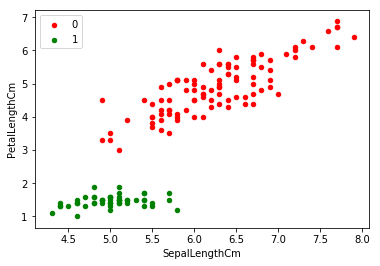

In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]
print(np.unique(df.Species))

y = np.where(df.Species == "Iris-setosa", 1, 0).astype(np.int32)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y,
                                    test_size = 0.3, random_state = 1)

colors = ["red", "green", "blue"]
fig, ax = plt.subplots()
for i, v in enumerate(np.unique(y)):
    df[y == v].plot.scatter(features[0], 
                    features[1], color = colors[i], ax = ax, label = v)
plt.legend()

scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X Tensor("X:0", shape=(?, 2), dtype=float32)
y Tensor("y:0", shape=(?,), dtype=int32)
W <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32_ref>
b <tf.Variable 'Variable_1:0' shape=(2,) dtype=float32_ref>
Z Tensor("add:0", shape=(?, 2), dtype=float32)
y_prob Tensor("Softmax:0", shape=(?, 2), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
0.693147
0.272615
0.191557
0.153168
0.129597
0.11324
0.101049
0.0915257
0.0838322
0.0774592
0.0613716
test accuracy 0.977778


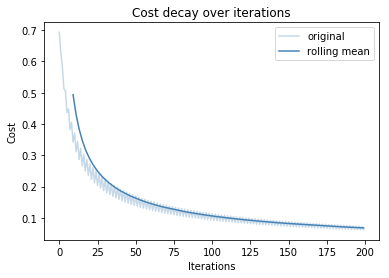

In [5]:
tf.reset_default_graph()
n_x = X_train_std.shape[1]
n_y = 2
max_iters = 200

X = tf.placeholder(dtype=tf.float32, shape=[None, n_x], name="X")
y = tf.placeholder(dtype=tf.int32, shape=[None], name="y")

y_oh = tf.one_hot(indices=y, depth=2)

print("X", X)
print("y", y)

W = tf.Variable(tf.zeros(dtype=tf.float32, shape=[n_x, n_y]))
print("W", W)

b = tf.Variable(tf.constant(0.0, shape=[n_y]))
print("b", b)

Z = tf.matmul(X, W) + b
print("Z", Z)

y_prob = tf.nn.softmax(Z)
print("y_prob", y_prob)

y_pred = tf.argmax(Z, axis=1, output_type=tf.int32)
print("y_pred", y_pred)


accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y), tf.float32))

print("accuracy", accuracy)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_oh, 
                                            logits=Z))

optimization = tf.train\
            .GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    scores = {}
    sess.run(tf.global_variables_initializer())
    batchable = Batchable(X_train_std, y_train, batch_size=64)
    for i in range(max_iters):
        X_batch, y_batch = batchable.next()
        cost_, _ = sess.run([cost, optimization], 
                feed_dict={X: X_batch, y:y_batch})
        scores[i] = cost_
        if i % (max_iters // 10) == 0 or i == max_iters-1:
            print(cost_)
    plot_scores(scores) 
    accuracy_ = sess.run(accuracy, feed_dict={X: X_test_std, y: y_test})
    print("test accuracy", accuracy_)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


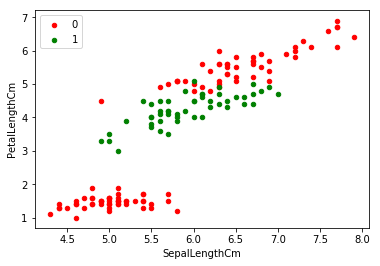

In [6]:
features = ["SepalLengthCm", "PetalLengthCm"]
print(np.unique(df.Species))

y = np.where(df.Species == 'Iris-versicolor', 1, 0).astype(np.int32)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y,
                                    test_size = 0.3, random_state = 1)

colors = ["red", "green", "blue"]
fig, ax = plt.subplots()
for i, v in enumerate(np.unique(y)):
    df[y == v].plot.scatter(features[0], 
                    features[1], color = colors[i],
                    ax = ax, label = v)
plt.legend()

scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X Tensor("X:0", shape=(?, 2), dtype=float32)
y Tensor("y:0", shape=(?,), dtype=int32)
y_prob Tensor("Softmax:0", shape=(?, 2), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
0.697267
0.609025
0.420443
0.184505
0.138788
0.129461
0.126277
0.124889
0.124158
0.123693
0.0425411
test accuracy 0.977778


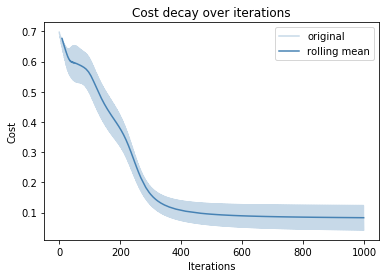

In [7]:
tf.reset_default_graph()
tf.set_random_seed(1)
n_x = X_train_std.shape[1]
n_y = 2
max_iters = 1000

X = tf.placeholder(dtype=tf.float32, shape=[None, n_x], name="X")
y = tf.placeholder(dtype=tf.int32, shape=[None], name="y")

y_oh = tf.one_hot(indices=y, depth=2)

print("X", X)
print("y", y)


def full_layer(input, size, activation = None):
    input_size = int(input.get_shape()[1])
    W = tf.Variable(tf.truncated_normal(stddev=0.1, shape=[input_size, size]))
    b = tf.Variable(tf.constant(0.1, shape=[size]))
    Z = tf.matmul(input, W) + b
    if not activation is None:
        Z = activation(Z)
    return Z
    

layer1 = full_layer(X, 3, tf.nn.tanh)
Z_out = full_layer(layer1, 2)

y_prob = tf.nn.softmax(Z_out)
print("y_prob", y_prob)

y_pred = tf.argmax(Z_out, axis=1, output_type=tf.int32)
print("y_pred", y_pred)


accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred, y), tf.float32))

print("accuracy", accuracy)

loss = tf.nn.softmax_cross_entropy_with_logits(labels=y_oh, 
                                            logits=Z_out)
cost = tf.reduce_mean(loss)

optimization = tf.train\
            .AdamOptimizer(learning_rate=0.01)\
            .minimize(cost)

with tf.Session() as sess:
    scores = {}
    sess.run(tf.global_variables_initializer())
    batchable = Batchable(X_train_std, y_train, batch_size=64)
    for i in range(max_iters):
        X_batch, y_batch = batchable.next()
        cost_, _ = sess.run([cost, optimization], 
                feed_dict={X: X_batch, y:y_batch})
        scores[i] = cost_
        if i % (max_iters // 10) == 0 or i == max_iters-1:
            print(cost_)
    plot_scores(scores) 
    accuracy_ = sess.run(accuracy, feed_dict={X: X_test_std, y: y_test})
    print("test accuracy", accuracy_)